In [398]:
#import liabrarys
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [399]:
df = pd.read_csv("C:\\Users\\muham\\Downloads\\customer_train.csv")
df

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,...,4,0,0,0,0,0,0,3,11,0
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,...,8,0,0,0,0,0,0,3,11,0
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,...,8,0,0,0,0,0,0,3,11,0
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,...,7,0,0,0,0,0,0,3,11,0


In [400]:
#data cleaning
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [401]:
unwanted_columns = ['Unnamed: 0.1', 'Unnamed: 0', 'Complain']
for column in unwanted_columns:
    del df[column]

In [402]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [403]:
df.rename(columns={'Dt_Customer': 'Date_Customer', 
                   'Z_CostContact': 'CostContact','Z_Revenue' : 'Revenue'}, inplace=True)

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   object 
 3   Marital_Status       1680 non-null   object 
 4   Income               1663 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Date_Customer        1680 non-null   object 
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

In [405]:
#coverting a string into date time format
df['Date_Customer'] = pd.to_datetime(df['Date_Customer'], format='%d-%m-%Y')

In [406]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Date_Customer          datetime64[ns]
Recency                         int64
MntCoke                         int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
CostContact                     int64
Revenue     

In [407]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Date_Customer           0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
CostContact             0
Revenue                 0
Response                0
dtype: int64

In [408]:
#Fill Missing Values with a Specific value :such as the mean or median of the column 
#replaces missing values with a central tendency measure.

mean_income = df['Income'].mean()
df['Income'].fillna(mean_income, inplace=True)

In [409]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Date_Customer          0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
CostContact            0
Revenue                0
Response               0
dtype: int64

In [410]:
len(df)

1680

creating feature "Customer_For" as an input variable in predictive models can enhance the model's accuracy and predictive power.

Subtract the 'Date_Customer' from the last recorded date to get the number of days each customer has been shopping in the store:

In [411]:
# Find the last recorded date in the dataset
last_recorded_date = df['Date_Customer'].max()

# Calculate the Customer_For feature
df['Customer_For'] = (last_recorded_date - df['Date_Customer']).dt.days

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,CostContact,Revenue,Response,Customer_For
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,...,7,0,0,0,0,0,3,11,1,663
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,...,5,0,0,0,0,0,3,11,0,113
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,...,4,0,0,0,0,0,3,11,0,312
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,...,6,0,0,0,0,0,3,11,0,139
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,...,5,0,0,0,0,0,3,11,0,161


 we want to change the language for better understanding

In [412]:
# Define the mapping dictionary for Marital_Status
marital_status_mapping = {
    'Lajang': 'Single',
    'Menikah': 'Married',
    'Bertunangan':'Engaged',
    'Cerai':'Divorced',
    'Janda':'Widowed',
    'Duda':'Widower'
}

# Replace the Marital_Status values using the mapping dictionary
df['Marital_Status'].replace(marital_status_mapping, inplace=True)

# Define a mapping dictionary for Education
education_mapping = {
    'S1':'Bsc',
    'S2':'Msc',
    'S3':'Phd',
    'D3':'Diploma',
    'SMA':'High SChool'
    
}

# Replace the Education values using the mapping dictionary
df['Education'].replace(education_mapping, inplace=True)

In [413]:
df['Marital_Status'].value_counts()

Marital_Status
Married     650
Engaged     438
Single      360
Divorced    177
Widowed      52
Widower       3
Name: count, dtype: int64

In [414]:
df['Education'].value_counts()

Education
Bsc            834
Phd            373
Msc            279
Diploma        159
High SChool     35
Name: count, dtype: int64

Customer Age Extraction:
The age of each customer based on their birth year available in the "Year_Birth" column.

In [415]:
current_year = 2023
df['Age'] = current_year - df['Year_Birth']

Total Spending Calculation ("Spent"):
The total amount spent by each customer across various product categories over a two-year span.

In [416]:
df['Spent'] = df[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

Household Children Counting ("Children"):
A new feature named "Children" to represent the total number of children in each household.
Combine the counts of kids and teenagers from the "Kidhome" and "Teenhome" columns, respectively.

In [417]:
df['Children'] = df['Kidhome'] + df['Teenhome']

Dropping some of the Unnecessary Features

In [418]:
to_drop = ["Date_Customer", "CostContact", "Revenue", "Year_Birth", "ID"]
df= df.drop(to_drop, axis=1)

Now that we've introduced new features, let's examine the statistical summary of the dataset.

In [419]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Customer_For,Age,Spent,Children
count,1.680000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,1.680000e+03,1680.000000,1680.000000,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000
mean,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,1.657738e+05,36954.761905,27016.666667,43339.880952,...,0.071429,0.074405,0.069048,0.062500,0.011905,0.144048,352.803571,54.152381,6.039030e+05,0.952381
std,2.137345e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,2.242424e+05,54165.456719,41529.595304,51363.336472,...,0.257616,0.262507,0.253611,0.242134,0.108490,0.351243,201.201805,12.027192,6.017014e+05,0.763284
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000e+03,0.000000
25%,3.579075e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,182.000000,46.000000,6.900000e+04,0.000000
50%,5.144550e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,353.000000,53.000000,3.915000e+05,1.000000
75%,6.789750e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,2.322500e+05,48000.000000,32000.000000,54250.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,528.000000,63.000000,1.035500e+06,1.000000
max,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,699.000000,130.000000,2.525000e+06,3.000000


The statistics indicate differences in the average income and age, as well as the highest income and age in the dataset. 
It's worth noting that the maximum age is listed as 130 years. This age might seem high, but it's calculated based on the birth year, assuming the current year is 2023. The data might be outdated.

To get a better understanding of the data, I'll create plots for certain features.

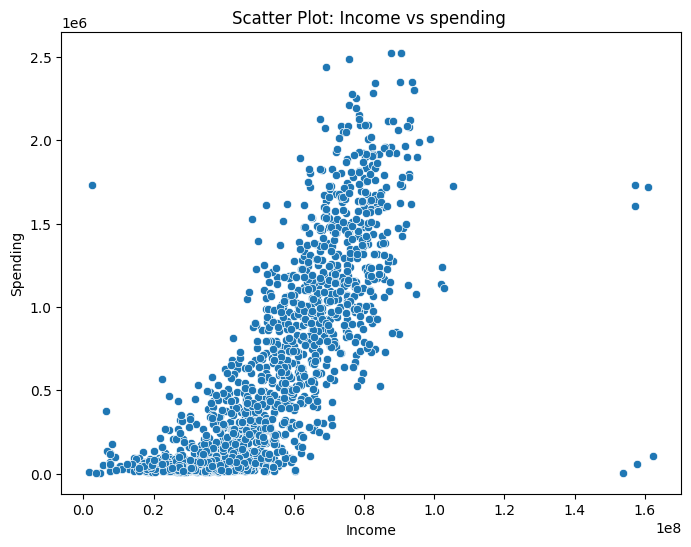

In [420]:
# Scatter Plot: Income vs. Spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Spent', data=df)
plt.title('Scatter Plot: Income vs spending ')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()

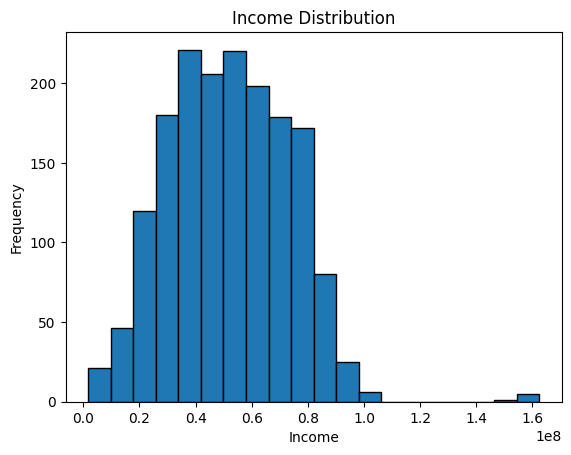

In [421]:
# Plot a histogram of income
plt.hist(df['Income'], bins=20, edgecolor='k')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()

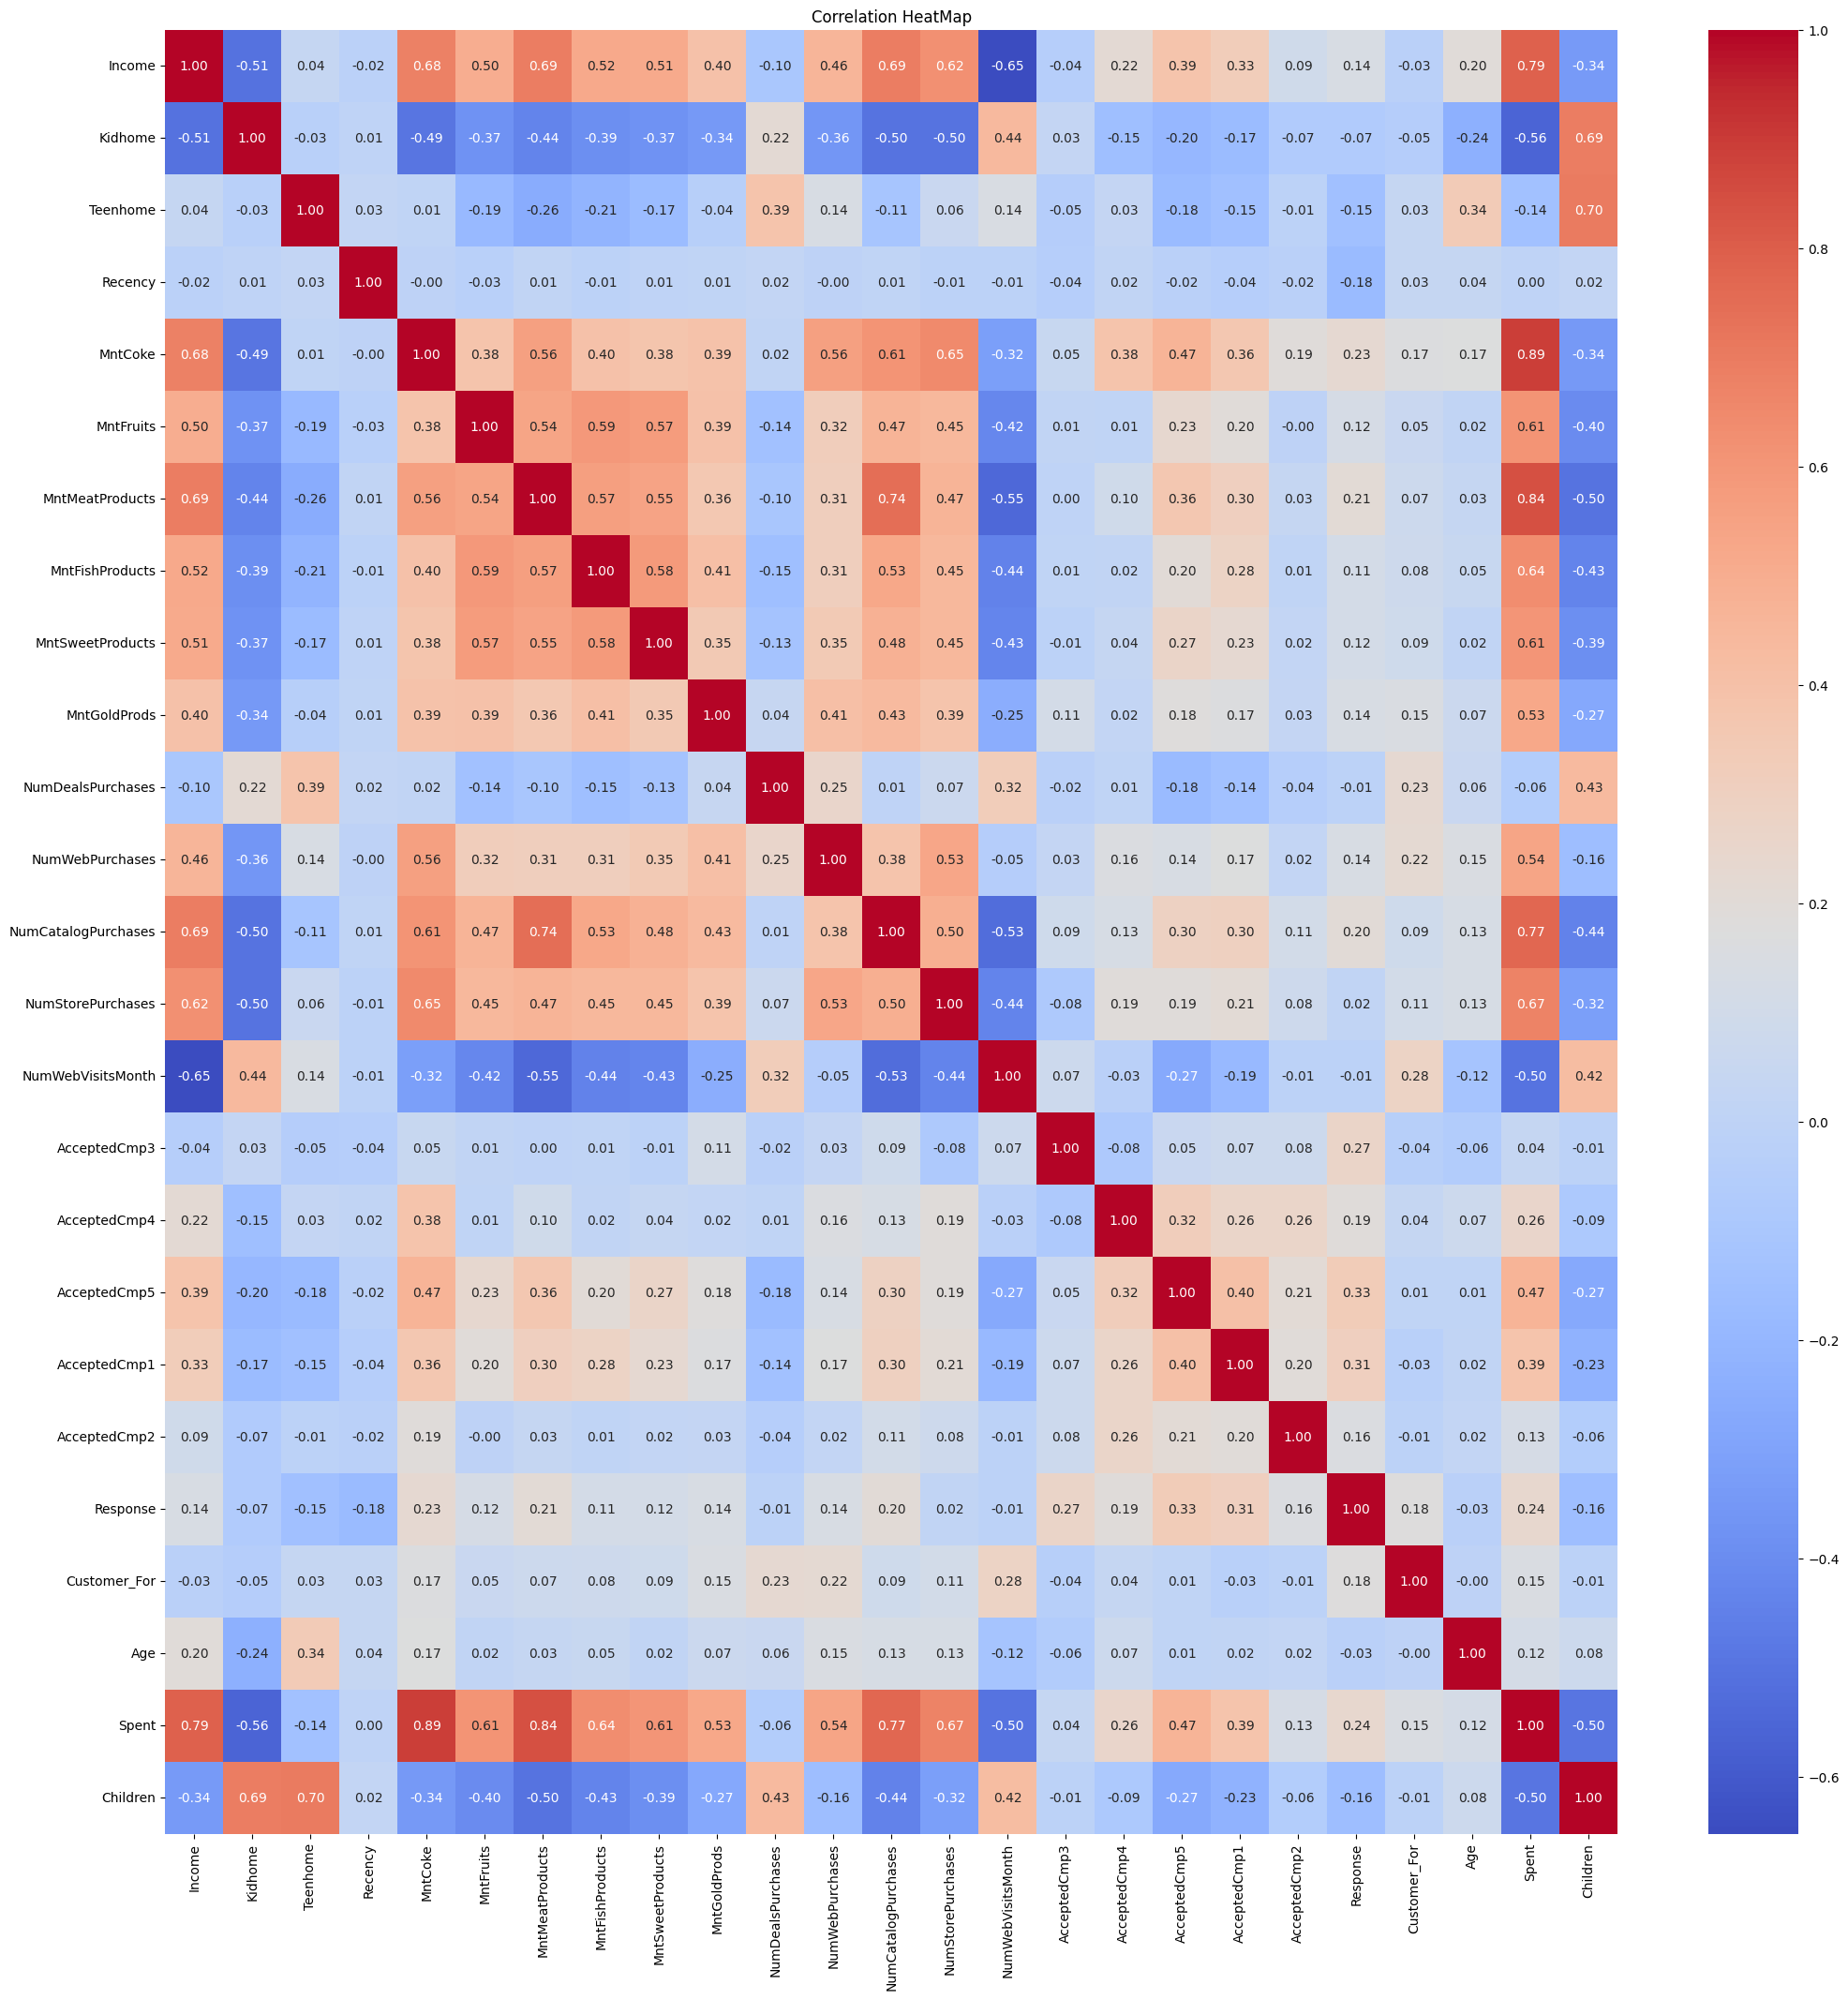

In [422]:
#calculate correlation matrix
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation HeatMap')
plt.show()

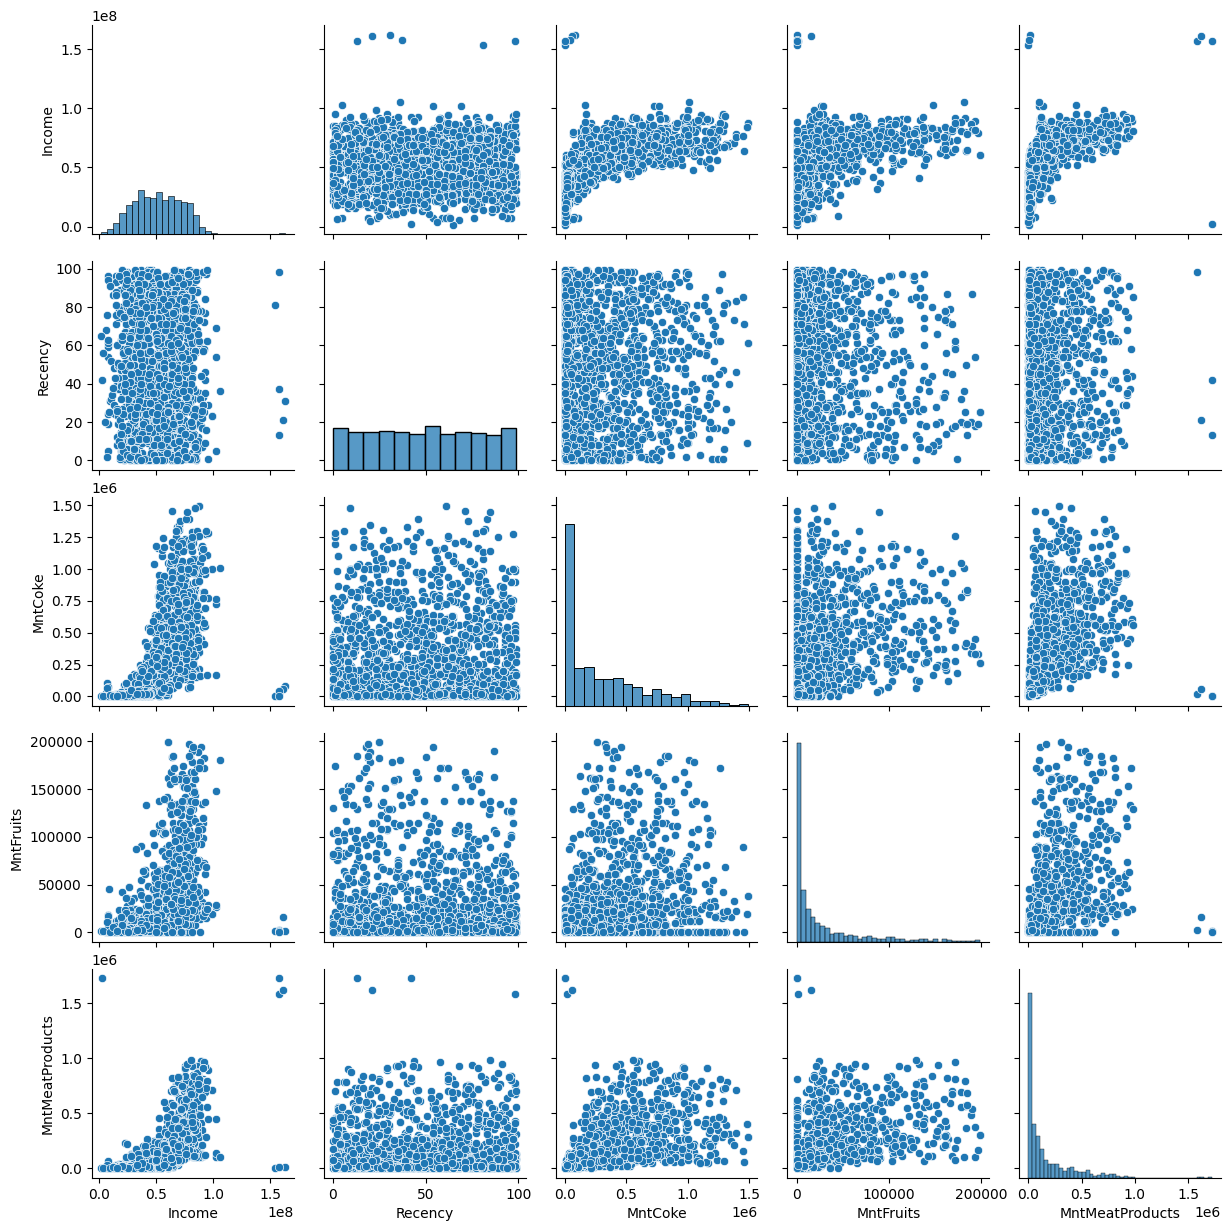

In [423]:
# Create a pairplot
sns.pairplot(df[['Income', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts']])
plt.show()

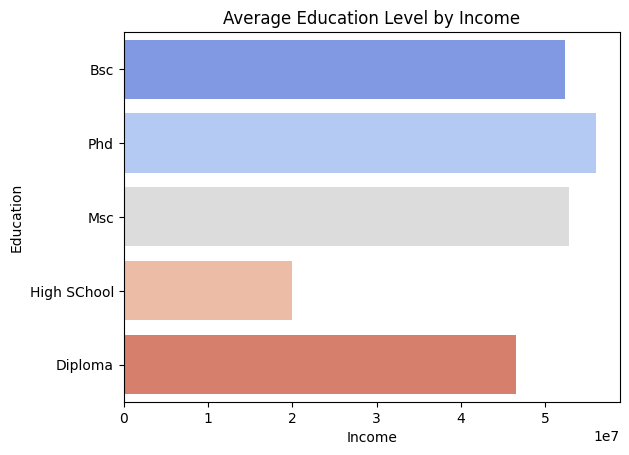

In [424]:
sns.barplot(x='Income', y='Education', data=df, estimator=lambda x: sum(x) / len(x), errorbar=None, palette='coolwarm')
plt.xlabel('Income')
plt.ylabel('Education')
plt.title('Average Education Level by Income')
plt.show()

In [425]:
customer_categorical=df.select_dtypes(include=["object","category"])
customer_categorical.head()

,Education,Marital_Status
0,Bsc,Single
1,Bsc,Single
2,Bsc,Engaged
3,Bsc,Engaged
4,Phd,Married


Testing Data

In [426]:
#Testing data
data=pd.read_csv("C:\\Users\\muham\\Downloads\\customer_test.csv")

In [427]:
data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1681,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,...,5,0,0,0,0,0,0,3,11,0
1,1682,1682,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,...,5,0,0,0,0,0,0,3,11,0
2,1683,1683,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,...,3,0,0,0,0,0,0,3,11,0
3,1684,1684,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,...,5,0,0,0,0,0,0,3,11,0
4,1685,1685,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,...,5,0,0,0,0,0,0,3,11,0


In [428]:
len(data)

559

Data Cleaning

In [429]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         559 non-null    int64  
 1   Unnamed: 0           559 non-null    int64  
 2   ID                   559 non-null    int64  
 3   Year_Birth           559 non-null    int64  
 4   Education            559 non-null    object 
 5   Marital_Status       559 non-null    object 
 6   Income               552 non-null    float64
 7   Kidhome              559 non-null    int64  
 8   Teenhome             559 non-null    int64  
 9   Dt_Customer          559 non-null    object 
 10  Recency              559 non-null    int64  
 11  MntCoke              559 non-null    int64  
 12  MntFruits            559 non-null    int64  
 13  MntMeatProducts      559 non-null    int64  
 14  MntFishProducts      559 non-null    int64  
 15  MntSweetProducts     559 non-null    int

In [430]:
data.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [431]:
data.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 7
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [432]:
unwanted_columns = ['Unnamed: 0.1', 'Unnamed: 0', 'Complain']
for column in unwanted_columns:
    del data[column]

In [433]:
data.rename(columns={'Dt_Customer': 'Date_Customer', 
                   'Z_CostContact': 'CostContact','Z_Revenue' : 'Revenue'}, inplace=True)

In [434]:
#coverting a string into date time format
data['Date_Customer'] = pd.to_datetime(data['Date_Customer'], format='%d-%m-%Y')

In [435]:
#Fill Missing Values with a Specific value :such as the mean or median of the column 
#replaces missing values with a central tendency measure.

mean_income = data['Income'].mean()
data['Income'].fillna(mean_income, inplace=True)

In [436]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Date_Customer          0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
CostContact            0
Revenue                0
Response               0
dtype: int64

In [437]:
# Define the mapping dictionary for Marital_Status
marital_status_mapping = {
    'Lajang': 'Single',
    'Menikah': 'Married',
    'Bertunangan':'Engaged',
    'Cerai':'Divorced',
    'Janda':'Widowed',
    'Duda':'Widower'
}

# Replace the Marital_Status values using the mapping dictionary
data['Marital_Status'].replace(marital_status_mapping, inplace=True)

# Define a mapping dictionary for Education
education_mapping = {
    'S1':'Bsc',
    'S2':'Msc',
    'S3':'Phd',
    'D3':'Diploma',
    'SMA':'High SChool'
    
}

# Replace the Education values using the mapping dictionary
data['Education'].replace(education_mapping, inplace=True)

In [438]:
data['Marital_Status'].value_counts()

Marital_Status
Married     214
Engaged     141
Single      124
Divorced     55
Widowed      25
Name: count, dtype: int64

In [439]:
data['Education'].value_counts()

Education
Bsc            292
Phd            113
Msc             91
Diploma         44
High SChool     19
Name: count, dtype: int64

Customer Age Extraction: The age of each customer based on their birth year available in the "Year_Birth" column.

In [440]:
current_year = 2023
data['Age'] = current_year - data['Year_Birth']

Total Spending Calculation ("Spent"): The total amount spent by each customer across various product categories over a two-year span.

In [441]:
data['Spent'] = data[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

Household Children Counting ("Children"):
A new feature named "Children" to represent the total number of children in each household.
Combine the counts of kids and teenagers from the "Kidhome" and "Teenhome" columns, respectively.

In [442]:
data['Children'] = data['Kidhome'] + data['Teenhome']

Dropping some of the Unnecessary Features

In [443]:
to_drop = ["Date_Customer", "CostContact", "Revenue", "Year_Birth", "ID"]
data= data.drop(to_drop, axis=1)

In [444]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Spent,Children
count,5.590000e+02,559.000000,559.000000,559.000000,5.590000e+02,559.000000,5.590000e+02,559.000000,559.000000,559.000000,...,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02,559.000000
mean,5.291597e+07,0.420394,0.525939,49.187835,3.003488e+05,27293.381038,1.698909e+05,39171.735242,27067.978533,45992.844365,...,5.273703,0.076923,0.075134,0.084079,0.067979,0.017889,0.164580,54.336315,6.097657e+05,0.946333
std,3.375894e+07,0.511880,0.527682,29.109522,3.303610e+05,40361.180414,2.300301e+05,56039.372894,40472.819695,54524.598562,...,2.357450,0.266708,0.263844,0.277754,0.251935,0.132667,0.371133,11.867607,6.035638e+05,0.716410
min,4.023000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,8.000000e+03,0.000000
25%,3.438550e+07,0.000000,0.000000,25.000000,2.300000e+04,2000.000000,1.500000e+04,3000.000000,2000.000000,9000.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,6.800000e+04,0.000000
50%,5.291597e+07,0.000000,1.000000,49.000000,1.750000e+05,8000.000000,6.400000e+04,12000.000000,8000.000000,25000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,4.130000e+05,1.000000
75%,6.925400e+07,1.000000,1.000000,74.000000,5.140000e+05,35000.000000,2.245000e+05,55000.000000,37500.000000,58500.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.500000,1.059500e+06,1.000000
max,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,194000.000000,1.607000e+06,258000.000000,262000.000000,321000.000000,...,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,83.000000,2.257000e+06,3.000000


In [445]:
customer_categorical=data.select_dtypes(include=["object","category"])
customer_categorical.head()

,Education,Marital_Status
0,Bsc,Engaged
1,Phd,Married
2,Phd,Married
3,Bsc,Married
4,Bsc,Married


Data Preprocessing

In [446]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])

In [447]:
features =['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2']

# Standardize the features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

C:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

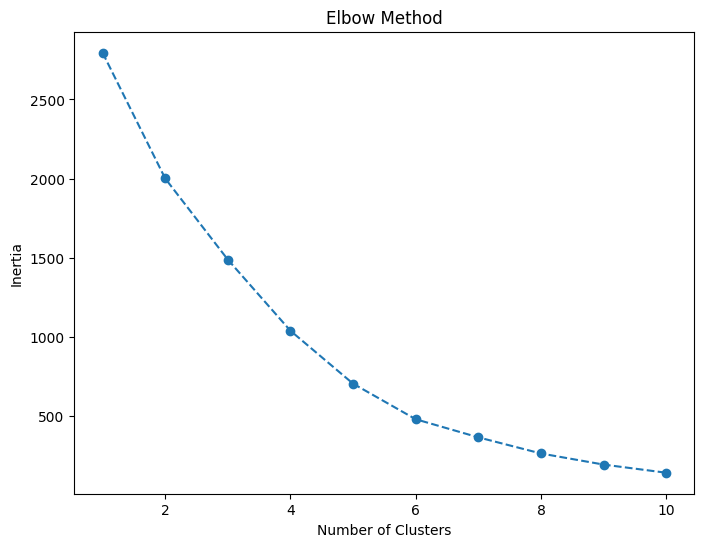

In [448]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[features])
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [449]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data['Clusters'] = kmeans.fit_predict(data[features])

data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Spent,Children,Clusters
0,0,1,38232000.0,1,1,84,43000,5000,28000,7000,...,-0.288675,-0.285023,-0.30298,-0.270068,-0.134963,0,52,122000,2,0
1,4,2,22554000.0,1,1,38,27000,0,10000,0,...,-0.288675,-0.285023,-0.30298,-0.270068,-0.134963,0,68,41000,2,0
2,4,2,23536000.0,1,0,53,6000,0,3000,0,...,-0.288675,-0.285023,-0.30298,-0.270068,-0.134963,0,40,10000,1,0
3,0,2,49413000.0,0,1,88,205000,7000,41000,3000,...,-0.288675,-0.285023,-0.30298,-0.270068,-0.134963,0,71,304000,1,0
4,0,2,42231000.0,1,1,99,24000,0,8000,0,...,-0.288675,-0.285023,-0.30298,-0.270068,-0.134963,0,54,37000,2,0


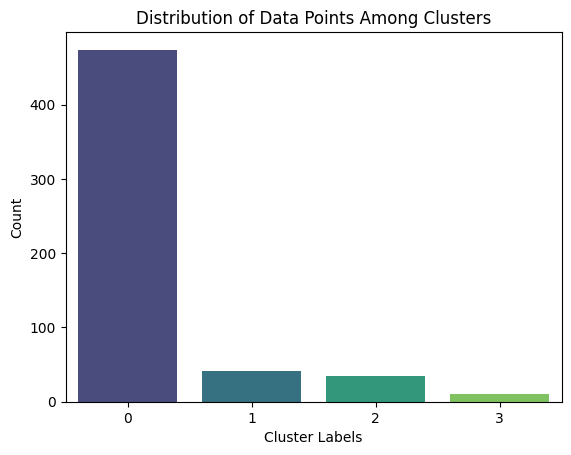

In [450]:
#Plotting countplot of clusters
sns.countplot(x='Clusters', data=data, palette='viridis')
plt.title('Distribution of Data Points Among Clusters')
plt.xlabel('Cluster Labels')
plt.ylabel('Count')
plt.show()

Not many people have responded to the campaigns yet, and very few participated in all three of them. To improve sales, we might need more focused and carefully planned campaigns that target the right audience.

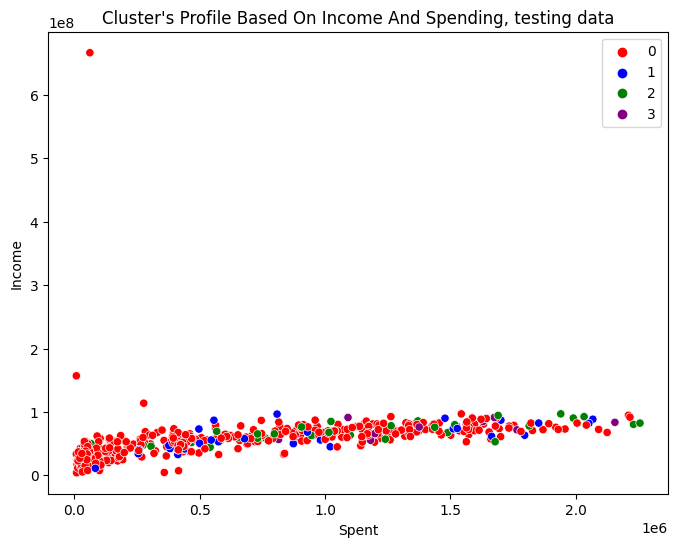

In [451]:
pal = ['red', 'blue', 'green', 'purple']
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Spent', y='Income', hue='Clusters', palette=pal)
plt.title("Cluster's Profile Based On Income And Spending, testing data")
plt.legend()
plt.show()

The plot shows four distinct groups of people:

Group 0: People with high spending but average income.

Group 1: High-income individuals with both high spending and high income.

Group 2: People with low spending habits and low income.

Group 3: Individuals who spend a lot despite having low income.

In [452]:
#Training Data
df.shape

(1680, 27)

In [458]:
X = data.drop(columns=['Clusters'])
y = data['Clusters']

In [460]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [461]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [463]:
predicted_clusters = rf_classifier.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, predicted_clusters)
print("Accuracy:", accuracy)

Accuracy: 1.0


Accuracy: 1.0" means the model is making perfect predictions for all the training data, showcasing its exceptional ability to provide accurate outcomes for every input during training.

In [464]:
predicted_clusters = rf_classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_clusters)
print("Accuracy:", accuracy)

Accuracy: 0.9702380952380952


An accuracy score of 0.9702 means the model is making correct predictions for approximately 97.02% of the testing data.